# Cab Sharing company

Recruiting and retaining drivers is seen by industry watchers as a tough battle for cab hiring companies. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to other companies depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Cab Hiring company is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.

**Column Profiling:**

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

**Problem Statement:** The frequent loss of drivers has a significant negative impact on organizational morale, and the cost of acquiring new drivers often exceeds the expense of retaining existing ones. Based on the provided features, our goal is to develop a predictive model that can accurately forecast driver churn. By identifying drivers who are likely to leave, the organization can take proactive measures to improve retention. 
This data-driven approach will enable the company to make informed decisions and optimize long-term workforce stability.

In [1]:
# importing important libraries for EDA 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# loading the data as a dataframe
df = pd.read_csv("ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.shape # showing total no of rows and columns

(19104, 14)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace = True) # dropping the feature as it will cause confusion to the mdel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
df.isna().sum() # showing total null values in all features

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df.loc[~df["LastWorkingDate"].isna()] # checking the data at which "LastWorkingdate" is not null

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1
12,03/01/19,5,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,0,1
20,11/01/20,8,34.0,0.0,C2,0,70656,19/09/20,15/11/20,3,3,0,1
27,12/01/19,12,35.0,0.0,C23,2,28116,29/06/19,21/12/19,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,02/01/20,2779,28.0,0.0,C26,0,95133,26/01/20,14/02/20,3,3,0,1
19054,08/01/19,2782,26.0,0.0,C19,1,29582,16/05/19,16/08/19,1,1,0,1
19081,10/01/20,2785,34.0,1.0,C9,0,12105,28/08/20,28/10/20,1,1,0,1
19090,09/01/19,2786,45.0,0.0,C19,0,35370,31/07/18,22/09/19,2,2,0,1


In [8]:
df.loc[df["Gender"].isna()].head() # checking the data at which "Gender" feature is not null

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
240,02/01/19,43,27.0,NaN,C15,0,12906,13/07/18,20/02/19,1,1,0,1
258,02/01/19,49,21.0,NaN,C20,0,53039,25/05/18,NaN,1,2,0,1
264,08/01/19,49,21.0,NaN,C20,0,53039,25/05/18,NaN,1,2,300300,2
466,08/01/19,68,31.0,NaN,C29,0,79288,18/10/15,NaN,1,3,544930,3
820,02/01/19,116,21.0,NaN,C11,0,16477,12/04/18,NaN,1,1,129590,1


# 1. Feature Engineering

In [9]:
# convertying the date-type feature from string to datetime type
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [11]:
df["LastWorkingDate"].nunique() # checking number on unique values

493

In [12]:
data = df.select_dtypes(["int","float"])
x = data.columns
data.isna().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [13]:
# imputing null values of numerical features  with knn imputation
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data = knn.fit_transform(data)
data = pd.DataFrame(data, columns = x)
data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [14]:
data.isna().sum() # checking null values in all features

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [15]:

data = pd.concat([data, df[["MMM-YY", "City", "Dateofjoining", "LastWorkingDate"]]], axis=1)
data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaT
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaT
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,2019-03-11
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaT
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaT


In [16]:
dict_agg = ({"Age":"last", "Gender":"last", "Education_Level":"last", "Income":"last", "Joining Designation":"last", "Grade":"last", 
          "Total Business Value":"sum", "Quarterly Rating":"last", "City":"last", "Dateofjoining":"first", 
          "LastWorkingDate":"last"})

data = data.groupby(["Driver_ID", "MMM-YY"]).agg(dict_agg)
data.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1.0       2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2.0       2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1.0       2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2.0       2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating City Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                           
1.0       2019-01-01               2.0  C23    2018-12-24             NaT  
          2019-02-01               2.0  C23    2018-12-24             NaT  
          2019-03-01               2.0  C23    2018-12-24      2019-03-11  
2.0       2020-11-01               1.0   C7    2020-11-06             NaT  
          2020-12-01               1.0   C7    2020-11-06             NaT

In [17]:
data.sort_index(ascending = [True, True])

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1.0       2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2.0       2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   
...                    ...     ...              ...      ...   
2788.0    2020-08-01  30.0     0.0              2.0  70254.0   
          2020-09-01  30.0     0.0              2.0  70254.0   
          2020-10-01  30.0     0.0              2.0  70254.0   
          2020-11-01  30.0     0.0              2.0  70254.0   
          2020-12-01  30.0     0.0              2.0  70254.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1.0       2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2.0       2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   
...                                   ...    ...                   ...   
2788.0    2020-08-01                  2.0    2.0              740280.0   
          2020-09-01                  2.0    2.0              448370.0   
          2020-10-01                  2.0    2.0                   0.0   
          2020-11-01                  2.0    2.0              200420.0   
          2020-12-01                  2.0    2.0              411480.0   

                      Quarterly Rating City Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                           
1.0       2019-01-01               2.0  C23    2018-12-24             NaT  
          2019-02-01               2.0  C23    2018-12-24             NaT  
          2019-03-01               2.0  C23    2018-12-24      2019-03-11  
2.0       2020-11-01               1.0   C7    2020-11-06             NaT  
          2020-12-01               1.0   C7    2020-11-06             NaT  
...                                ...  ...           ...             ...  
2788.0    2020-08-01               3.0  C27    2020-06-08             NaT  
          2020-09-01               3.0  C27    2020-06-08             NaT  
          2020-10-01               2.0  C27    2020-06-08             NaT  
          2020-11-01               2.0  C27    2020-06-08             NaT  
          2020-12-01               2.0  C27    2020-06-08             NaT  

[19104 rows x 11 columns]

In [18]:
# asign a new dataframe df1 to store the unique Driver_ID, to merge the all the features corresponding to Driver_ID
df1 = pd.DataFrame()
df1["Driver_ID"] = df["Driver_ID"].unique()



In [19]:
df1['Age'] = list(df.groupby('Driver_ID').agg({"Age":"last"})["Age"])
df1['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df1['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df.groupby('Driver_ID').agg({'Total Business Value':'sum'})['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])


df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2
1,2,31.0,0.0,C7,2,67016,2,2,0,1
2,4,43.0,0.0,C13,2,65603,2,2,350000,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2


In [20]:
df1.shape 

(2381, 10)

In [21]:
# adding a new feature in the dataframe "Quarterlyrating_increased" to check whether quarterly_rating increased for each Driver_ID
y = data.groupby("Driver_ID").agg({"Quarterly Rating":"first"})["Quarterly Rating"].reset_index()
z = list(df1["Last_Quarterly_Rating"].values - y["Quarterly Rating"].values)
df1["Quarterlyrating_increased"] = [1 if x > 0 else 0 for x in z]

In [22]:
# adding a new feature in the dataframe "Income_inc" to check whether income increased for each Driver_ID
y = data.groupby("Driver_ID").agg({"Income":"first"})["Income"].reset_index()
z = list(df1["Income"].values - y["Income"].values)
df1["Income_inc"] = [1 if x > 0 else 0 for x in z]

In [23]:
# adding the Traget features based on the "LastWorkingDate" feature for each Driver_ID
df1["Target"] = [0 if pd.isna(x) else 1 for x in (data.groupby("Driver_ID").agg({"LastWorkingDate":"last"})["LastWorkingDate"].values)]


In [24]:
df1.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc,Target
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0


In [25]:
df1.shape

(2381, 13)

In [26]:
df1.dtypes

Driver_ID                      int64
Age                          float64
Gender                       float64
City                          object
Education                      int64
Income                         int64
Joining_Designation            int64
Grade                          int64
Total_Business_Value           int64
Last_Quarterly_Rating          int64
Quarterlyrating_increased      int64
Income_inc                     int64
Target                         int64
dtype: object

In [27]:
df1.City.value_counts()

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64

# 2. Exploratory Data Analysis (EDA)

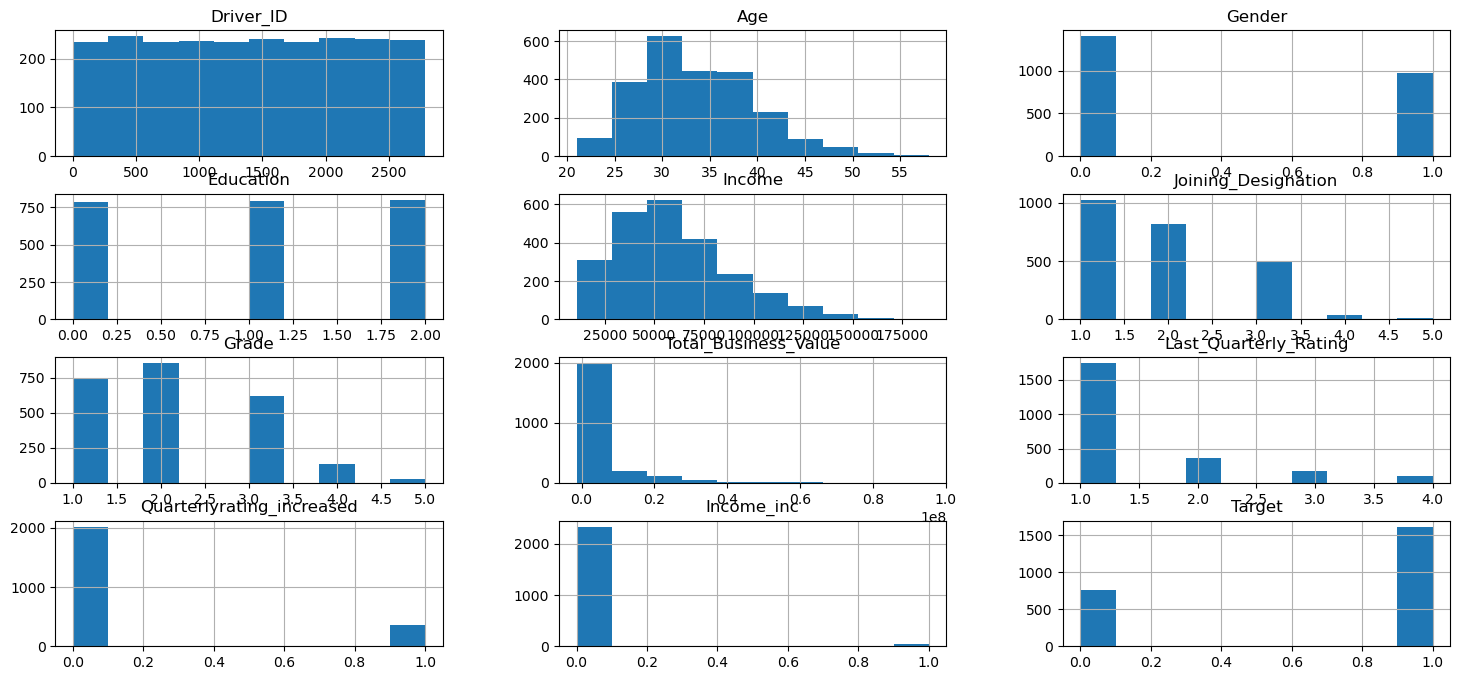

In [28]:
# hostogram for all features
df1.hist(figsize = (18,8))
plt.show()

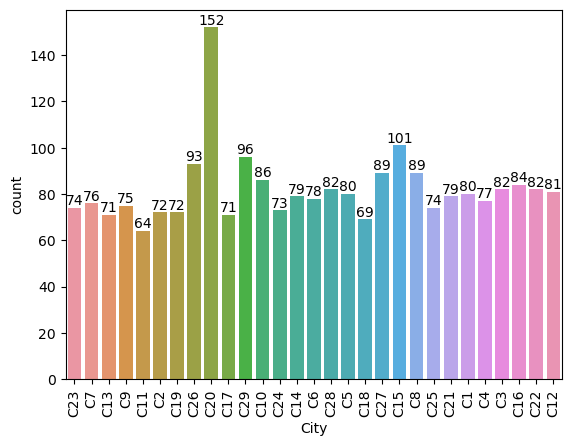

In [29]:
# countplot for categorical feature City
b = sns.countplot(data=df1, x = "City")
b.bar_label(b.containers[0], label_type="edge")
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x900 with 0 Axes>

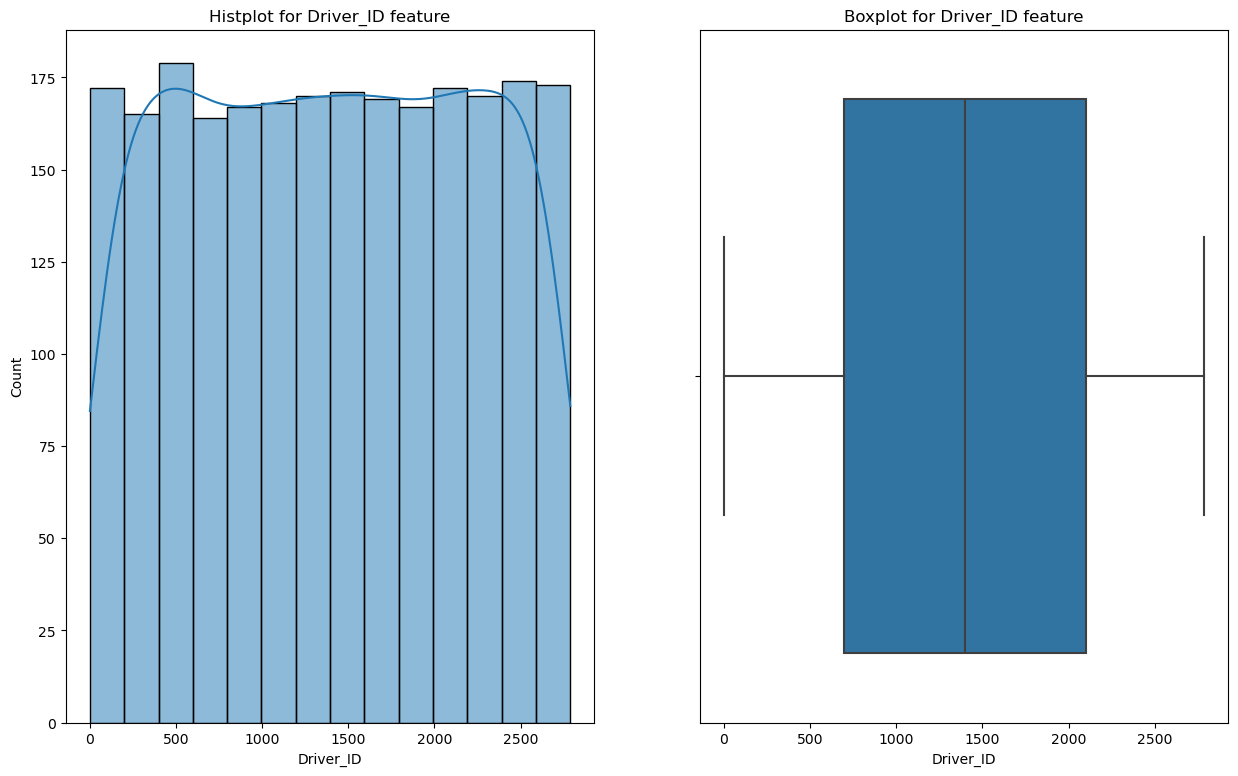

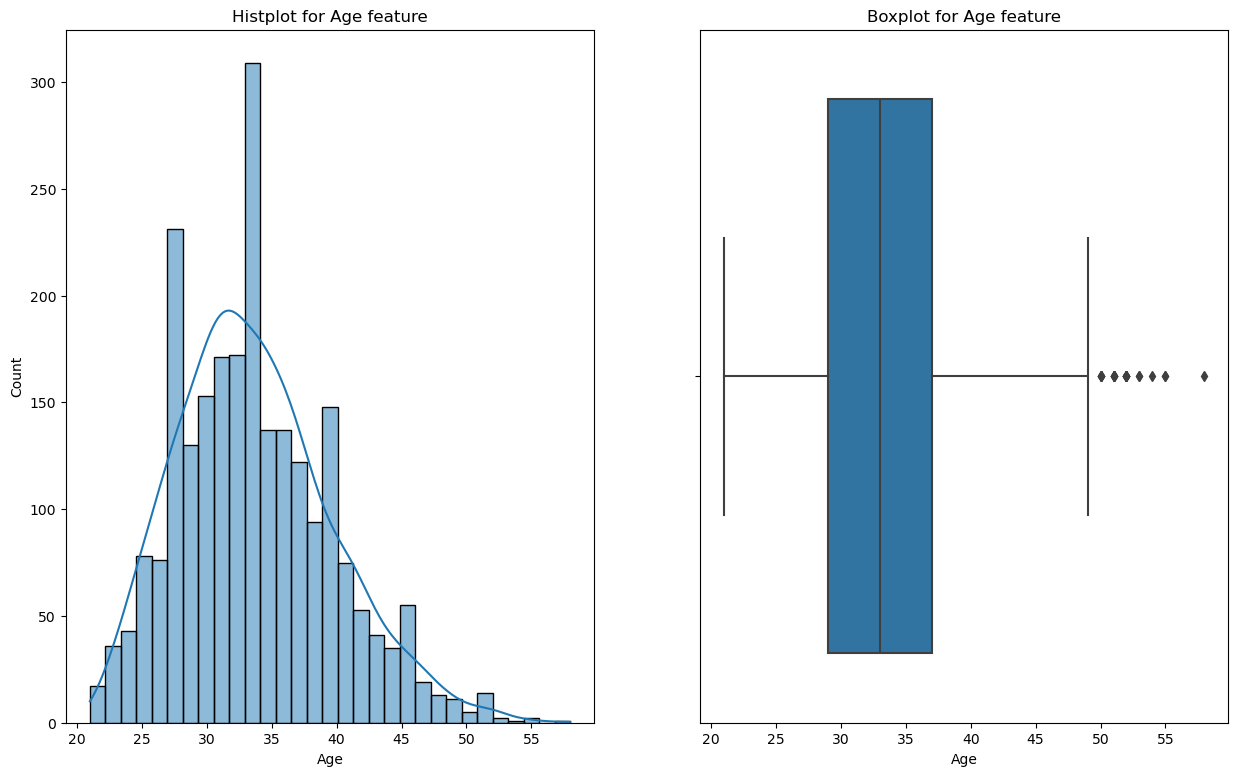

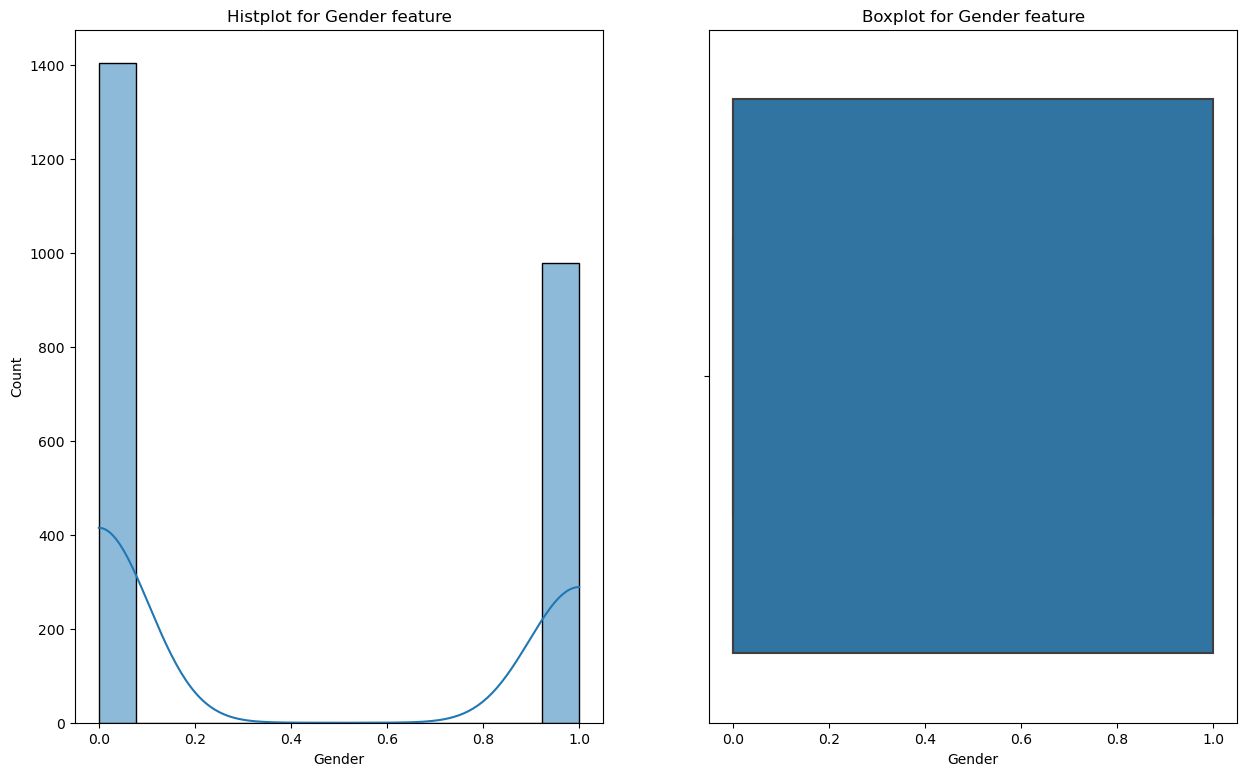

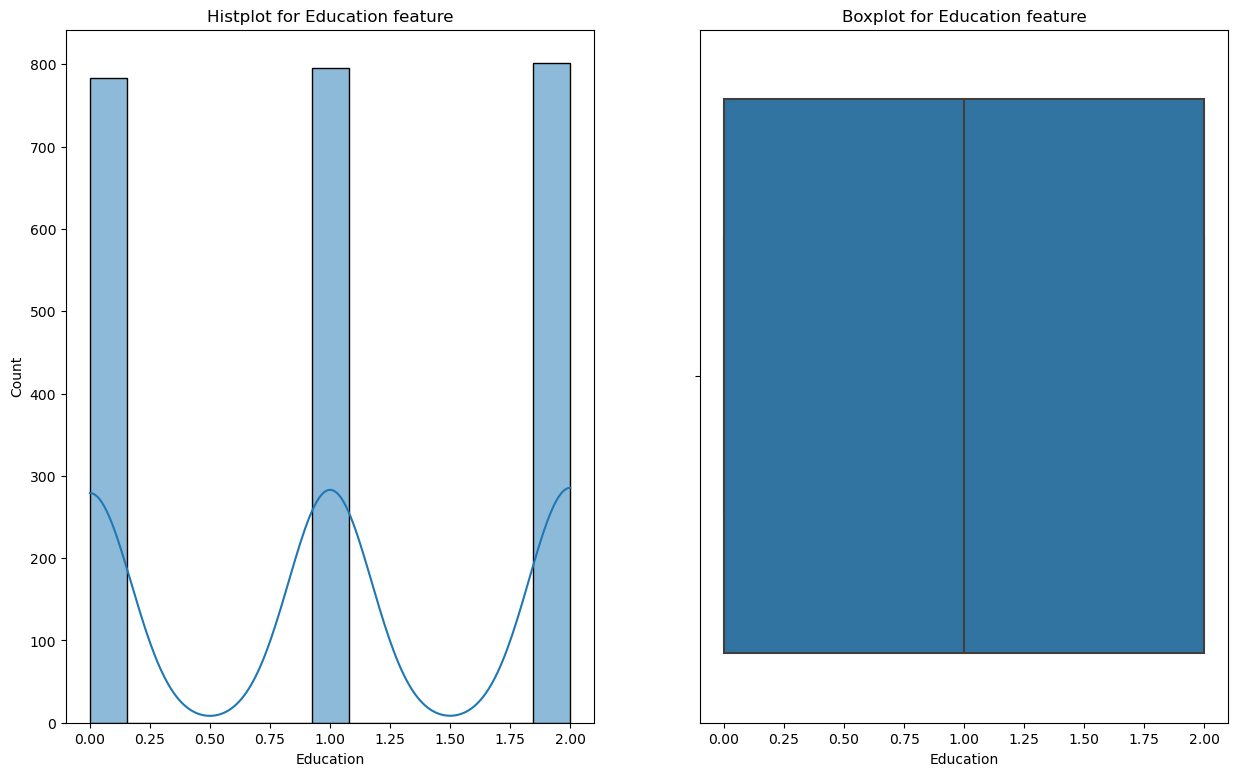

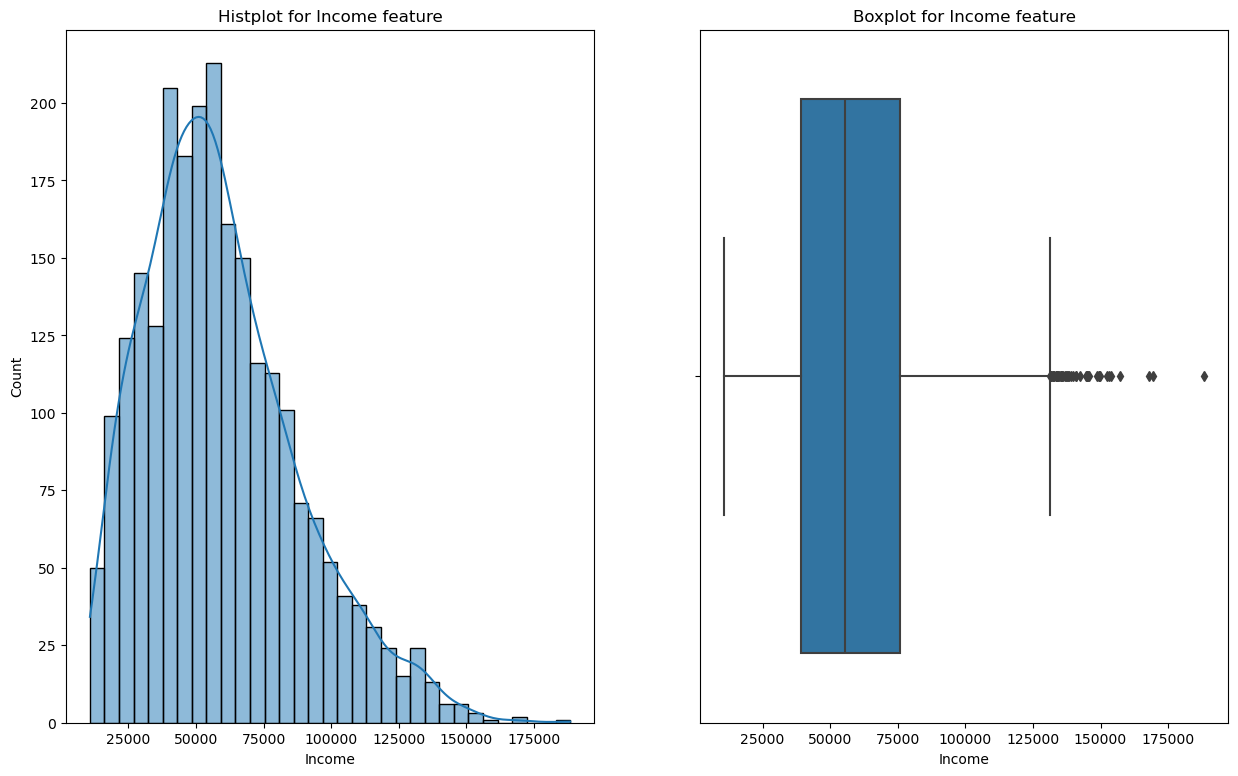

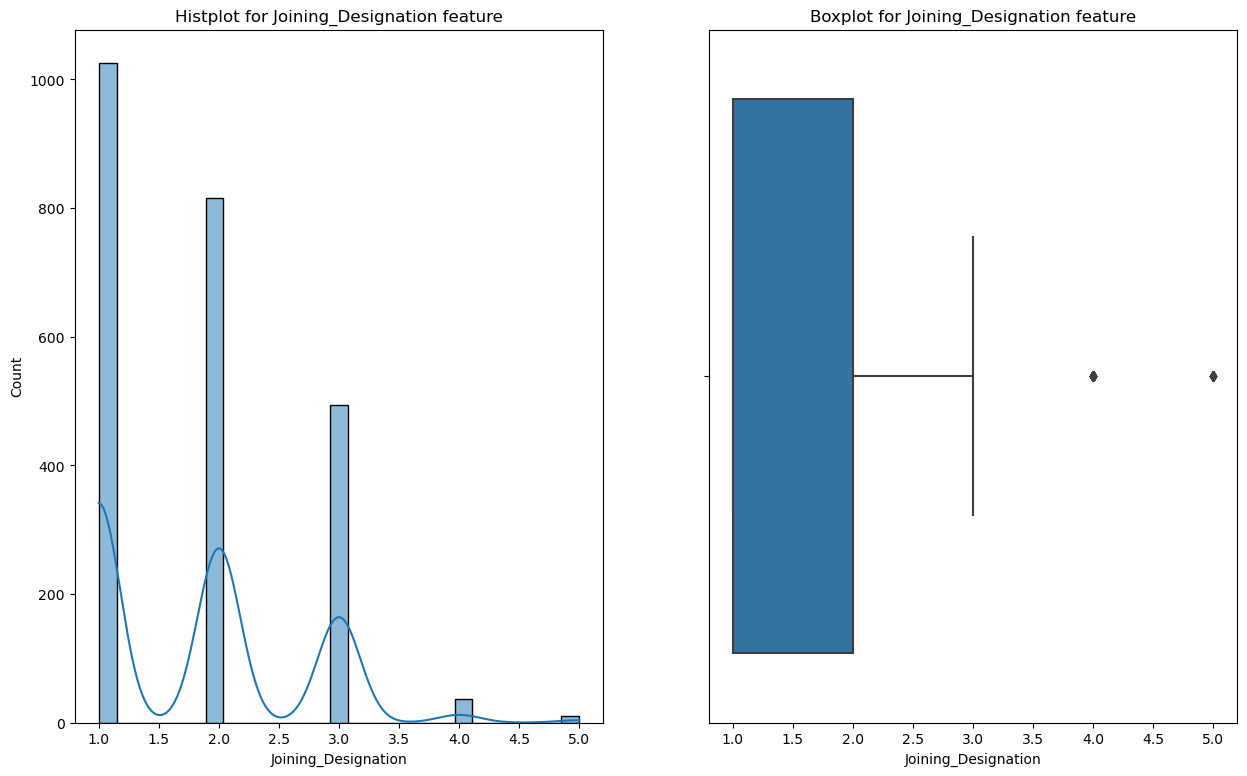

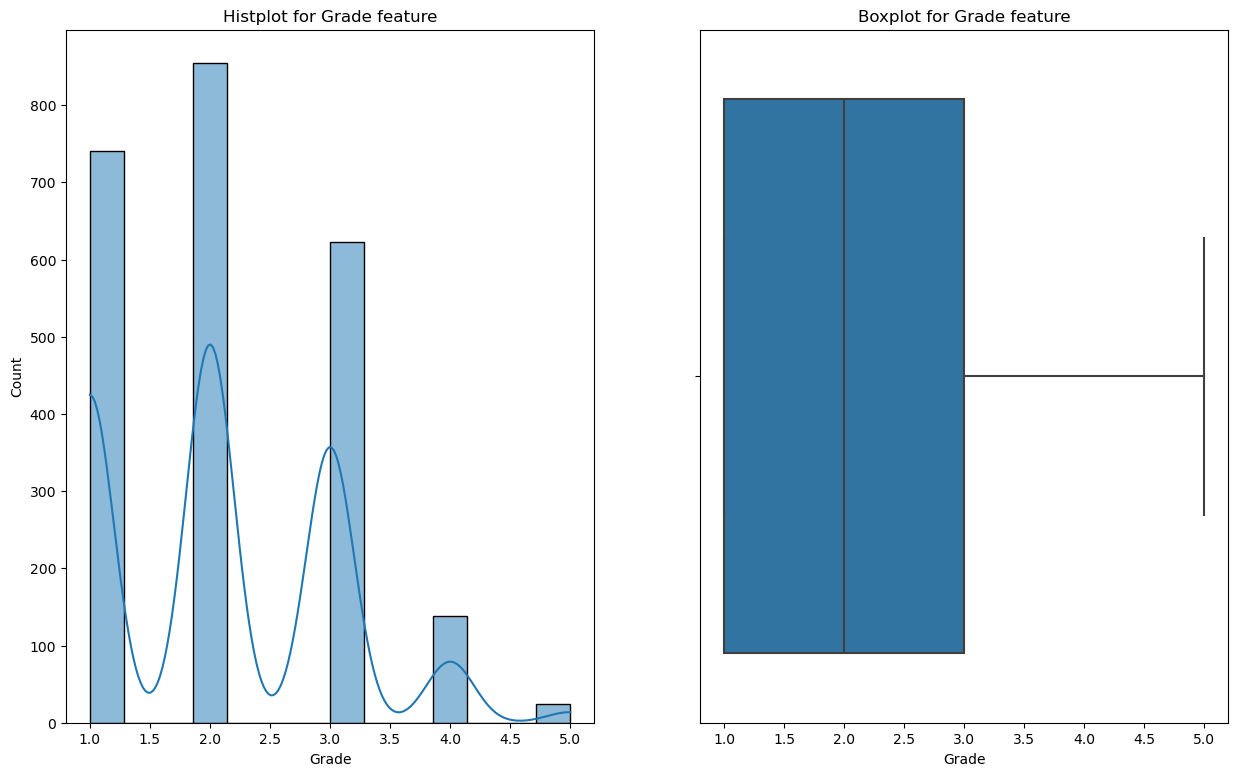

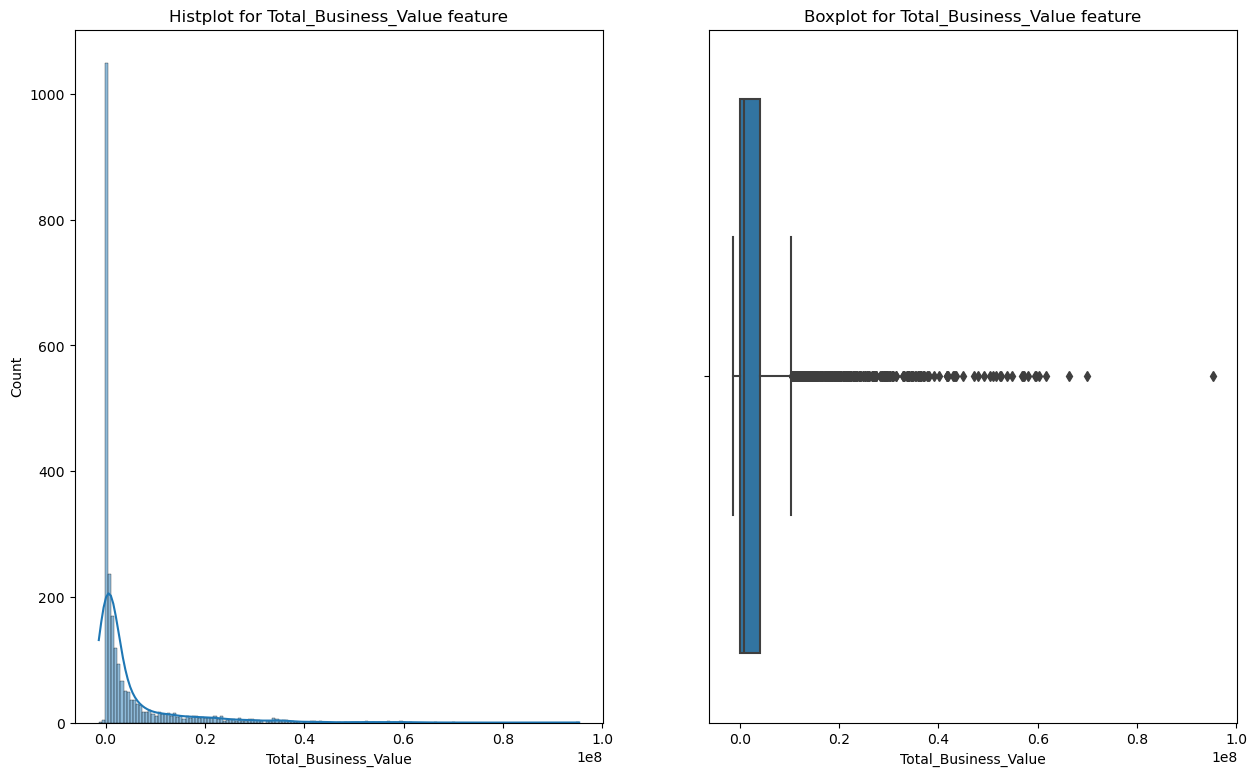

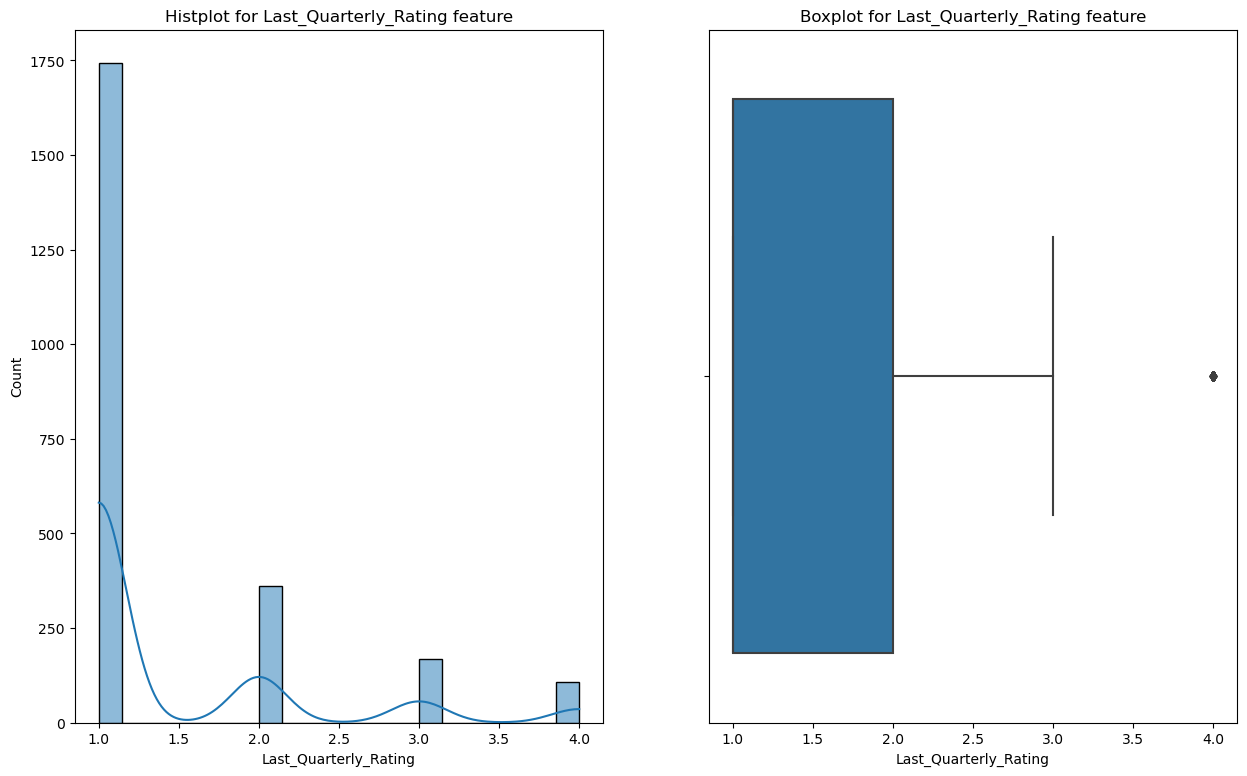

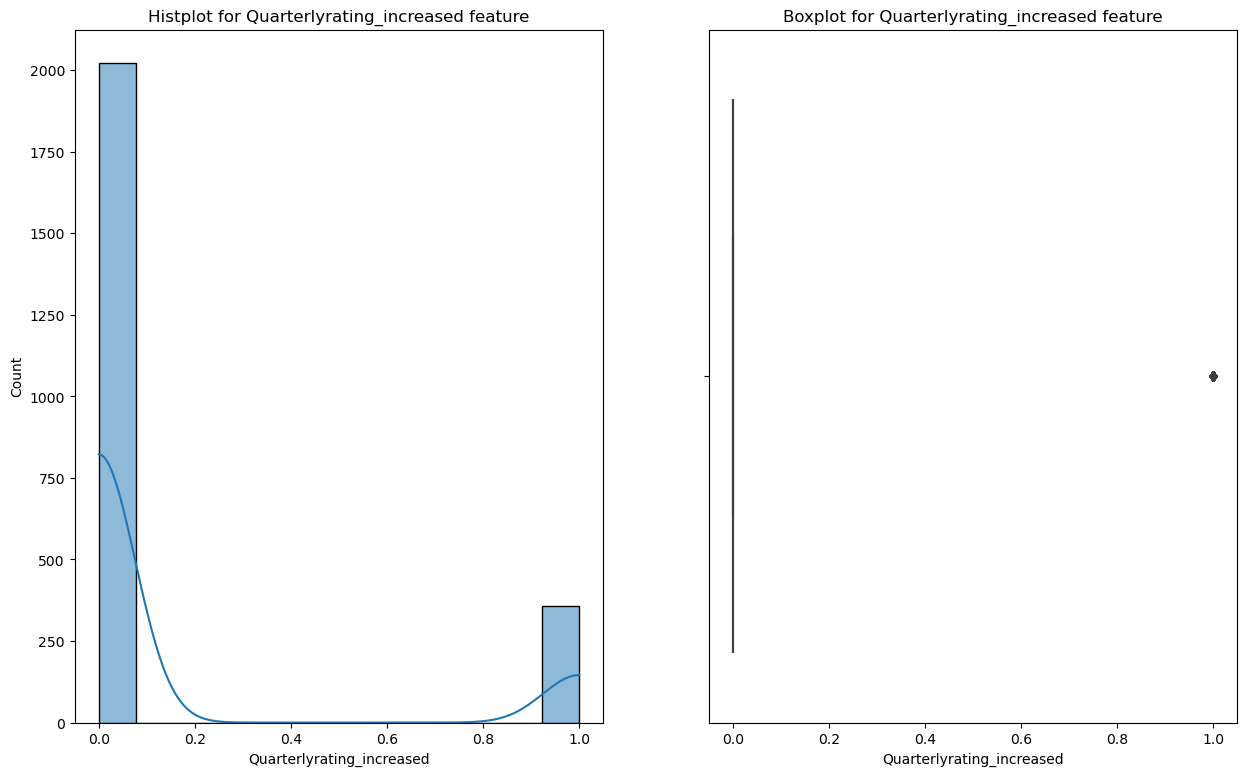

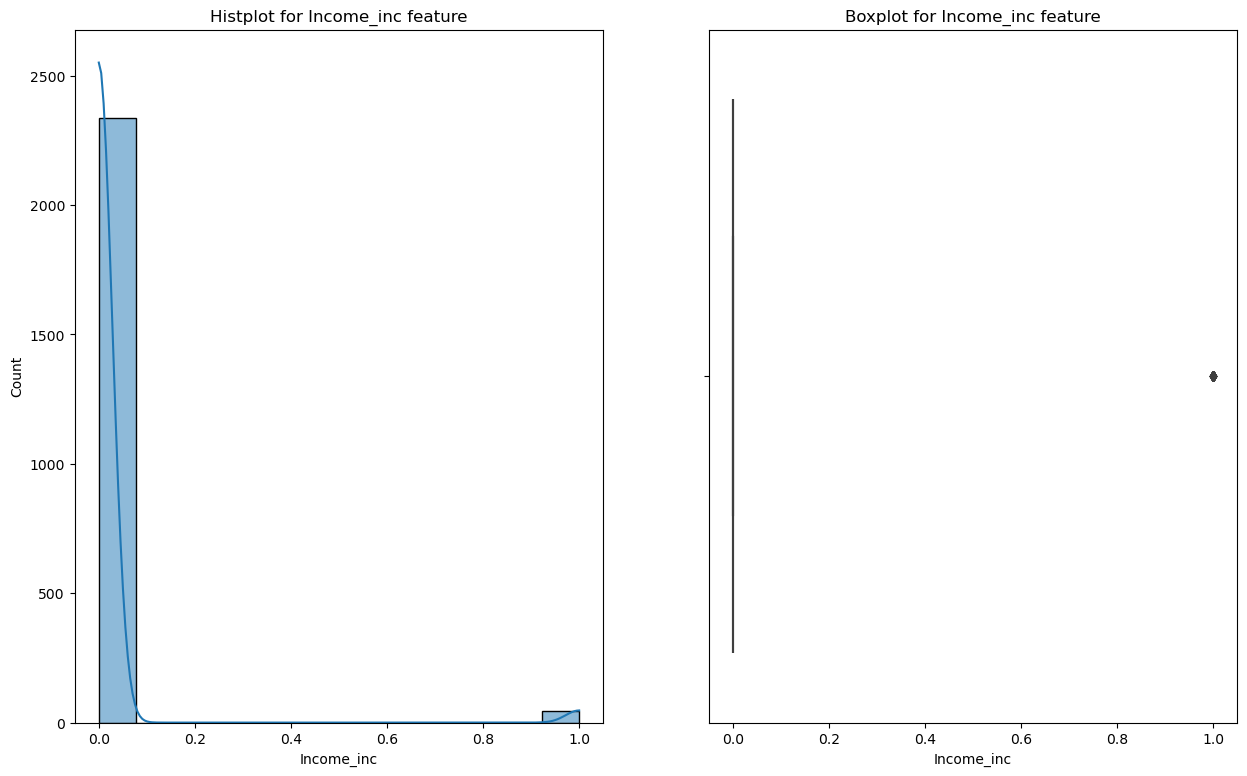

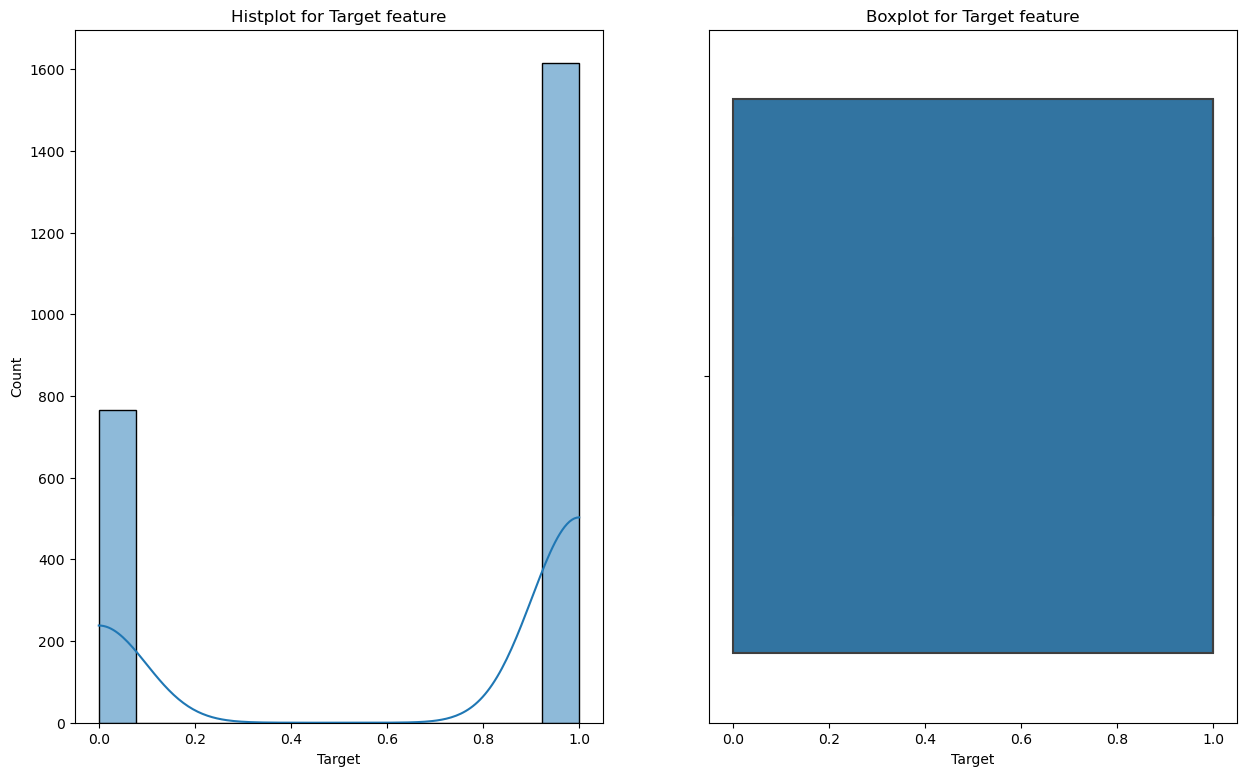

In [30]:
plt.figure(figsize = (15,9))
for i in df1.select_dtypes(["int","float"]).columns:
    plt.figure(figsize = (15,9))
    plt.subplot(1,2,1)
    sns.histplot(data = df1, x = i, kde = True) # Histogram for numerical features
    plt.title(f"Histplot for {i} feature")

    
    plt.subplot(1,2,2)    
    sns.boxplot(data = df1, x = i) # Boxplot for numerical features
    plt.title(f"Boxplot for {i} feature")
    plt.show()

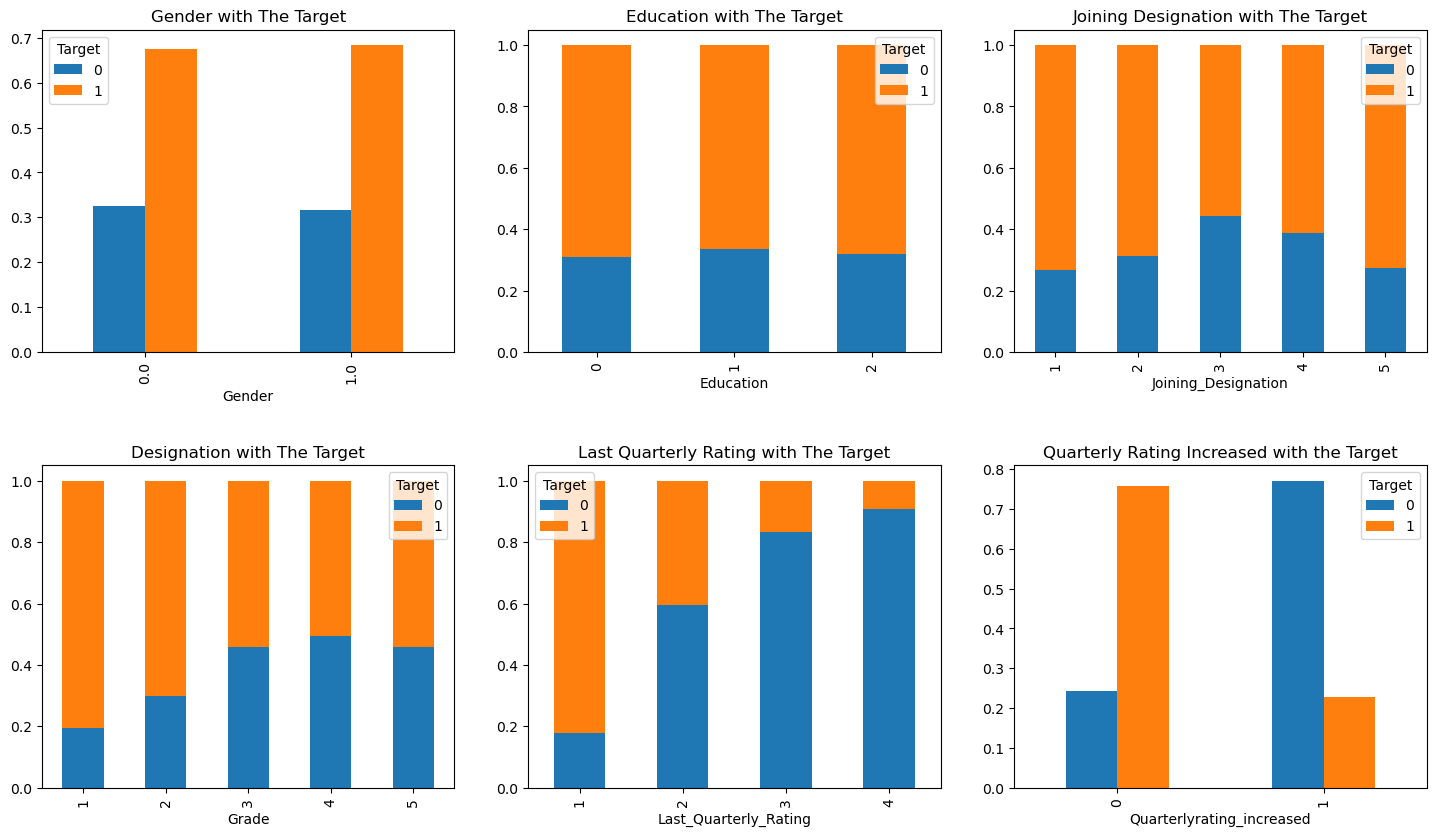

In [31]:
figure,axes=plt.subplots(2,3,figsize=(15,9))

#Gender feature with Target
gender = pd.crosstab(df1['Gender'],df1['Target'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[0,0],title="Gender with The Target")

#Education feature with Target
education = pd.crosstab(df1['Education'],df1['Target'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],
                                                          title="Education with The Target")

#Joining Designation feature with Target
jde = pd.crosstab(df1['Joining_Designation'],df1['Target'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,2],
                                                      title="Joining Designation with The Target")

#Designation feature with Target
desig = pd.crosstab(df1['Grade'],df1['Target'])
desig.div(desig.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],
                                                    title="Designation with The Target")

#Last Quarterly Rating feature with Target
lqrate = pd.crosstab(df1['Last_Quarterly_Rating'],df1['Target'])
lqrate.div(lqrate.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],
                                                      title="Last Quarterly Rating with The Target")

#Quarterly Rating Increased feature with Target
qratei = pd.crosstab(df1['Quarterlyrating_increased'],df1['Target'])
qratei.div(qratei.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[1,2],
                                                         title="Quarterly Rating Increased with the Target")

plt.tight_layout(pad=3)

**Insights:**

- The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.
- The drivers who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
- The drivers who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.
- The drivers who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.
- The drivers whose quarterly rating has increased are less likely to leave the organization.

<Figure size 3000x700 with 0 Axes>

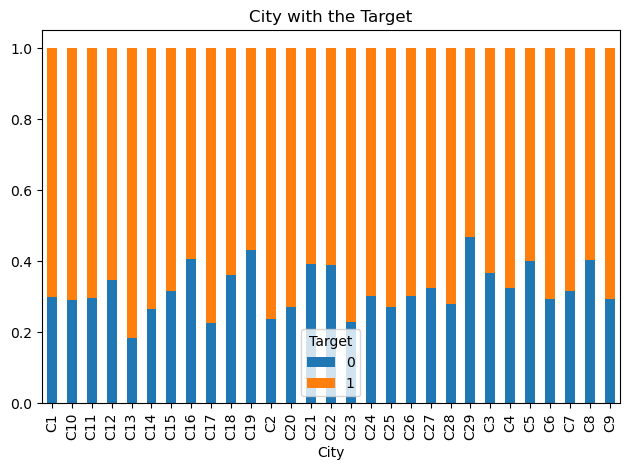

In [32]:
#City feature with the target
plt.figure(figsize=(30,7))
city = pd.crosstab(df1['City'],df1['Target'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="City with the Target")
plt.tight_layout()

**Insights:**

- The drivers who belong to City - C29, C19, C8, C5 at the time of reporting are less likely to leave the organization.

<Axes: title={'center': 'Age with Target'}, xlabel='Age'>

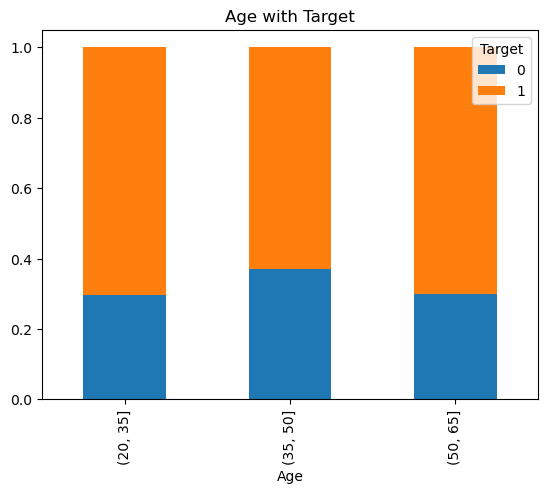

In [33]:
#Binning the Age into categories
x = pd.cut(df1['Age'],bins=[20,35,50,65])

#Age feature with Target
agebin = pd.crosstab(x,df1['Target'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Age with Target")

**Insights:**

- The driverss whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.

<Figure size 2500x1500 with 0 Axes>

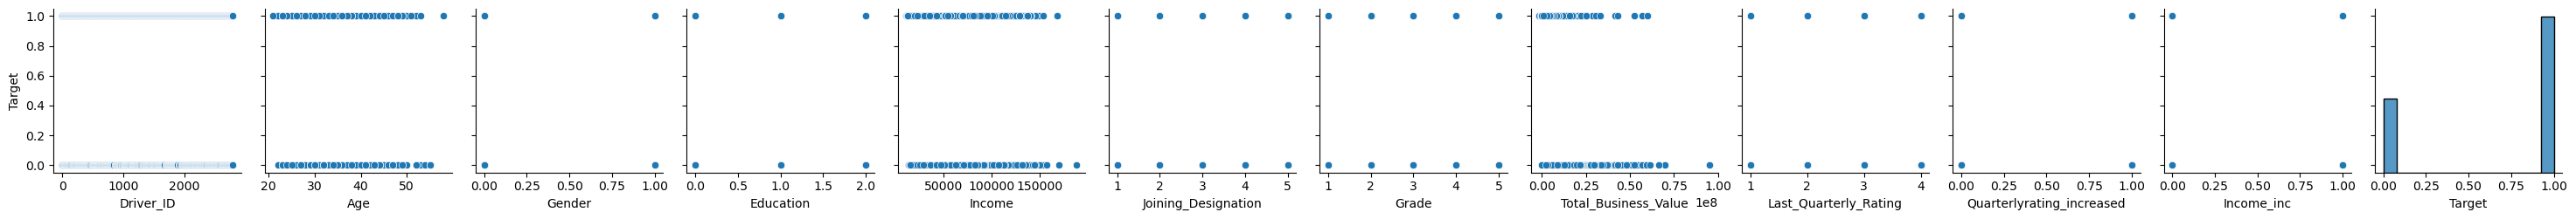

In [34]:
plt.figure(figsize=(25,15))
sns.pairplot(data=df1, y_vars = "Target")
plt.show()

<Axes: title={'center': 'Income with Target'}, xlabel='Income'>

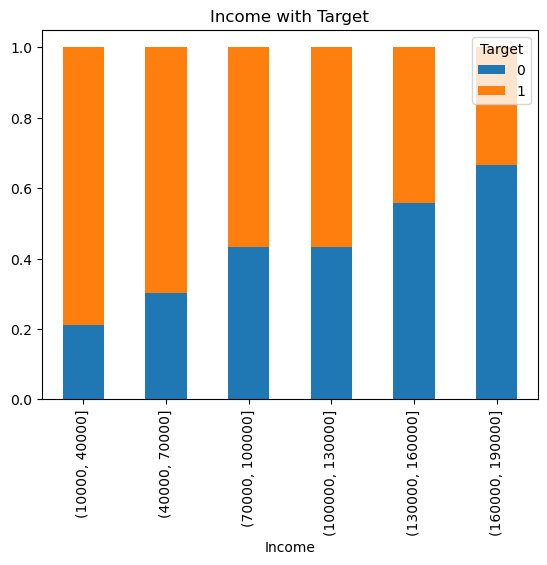

In [35]:
#Binning the Income into categories
x = pd.cut(df1['Income'],bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ])

#Salary feature with Target
salarybin = pd.crosstab(x,df1['Target'])
salarybin.div(salarybin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Income with Target")

**Insights:**

- The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization.

<Axes: title={'center': 'Total Business Value with Target'}, xlabel='Total_Business_Value'>

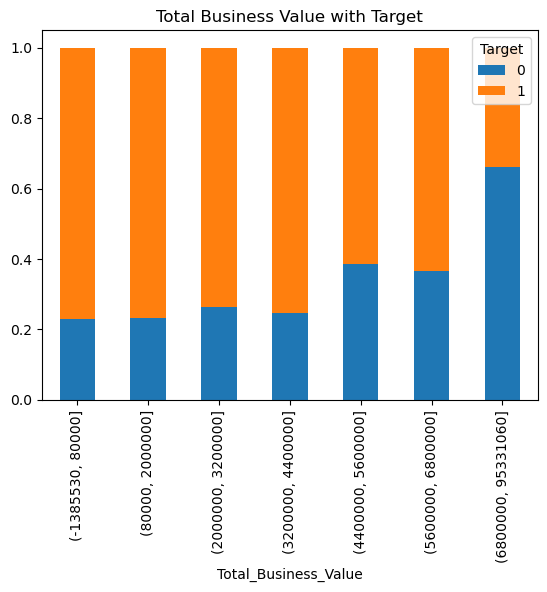

In [36]:
#Defining the bins and groups
m1 = round(df1['Total_Business_Value'].min())
m2 = round(df1['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

#Binning the Total Business Value into categories
x = pd.cut(df1['Total_Business_Value'],bins)

#Total Business Value feature with Target
tbvbin = pd.crosstab(x,df1['Target'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Total Business Value with Target")

In [37]:
df1.Target.value_counts()

Target
1    1616
0     765
Name: count, dtype: int64

**Insights:**

- The drivers who have acquired total business value greater than 68,00,000 are less likely to leave the organiztion.

# 3. Train Test Split

In [38]:
# dropping the driver_id as it is unique identifier for the row, it will cause confusion to the  model
df1.drop("Driver_ID", axis=1, inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop("Target",axis=1),df1["Target"],test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(1904, 11) (1904,)


In [40]:
import category_encoders as ce

# Initialize target encoder
target_encoder = ce.TargetEncoder(cols=['City'])

# Fit the encoder to the training data and transform both train and test sets
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Display encoded data
print("Encoded Train Set:\n", X_train_encoded.shape)
print("\nEncoded Test Set:\n", X_test_encoded.shape)


Encoded Train Set:
 (1904, 11)

Encoded Test Set:
 (477, 11)


In [41]:
X_train_encoded.head()

,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc
457,28.0,0.0,0.745108,0,87872,3,3,0,1,0,0
1739,34.0,0.0,0.699186,0,38619,2,2,466160,1,0,0
1848,27.0,0.0,0.732320,0,53105,1,2,0,1,0,0
1410,30.0,1.0,0.611473,2,34234,1,1,3489080,2,1,0
829,47.0,0.0,0.611473,0,90484,1,3,22388420,3,0,0


In [42]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns = X_train_encoded.columns) # Normalizing the training Data
X_test = pd.DataFrame(scaler.transform(X_test_encoded), columns = X_test_encoded.columns) # Normalizing the testing data with the parameters of training data


In [43]:
X_test.head() #unseen data

,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterlyrating_increased,Income_inc
0,0.441176,0.0,0.218236,1.0,0.274293,0.25,0.25,0.014326,0.0,0.0,0.0
1,0.176471,1.0,0.000000,1.0,0.374974,0.00,0.50,0.029269,0.0,0.0,0.0
2,0.235294,0.0,0.530212,0.5,0.260245,0.25,0.25,0.014326,0.0,0.0,0.0
3,0.294118,0.0,0.218236,1.0,0.114690,0.00,0.00,0.014326,0.0,0.0,0.0
4,0.411765,0.0,0.000000,1.0,0.163651,0.00,0.00,0.017944,0.0,0.0,0.0


# 4. Bagging (Random Forest)

In [45]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC(class_weight = "balanced") # using classweight instead of balancing the dataset with the synthetic one
clf = RandomizedSearchCV(rfc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now() # checking time before Hyperparameter tuning
clf.fit(X_train, y_train)
end = dt.datetime.now() # # checking time after Hyperparameter tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [47]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 3} Mean_score: 0.8521338592482354 Rank: 7
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 10} Mean_score: 0.8554093406472281 Rank: 4
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.8565233241654532 Rank: 2
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.8507365136507662 Rank: 9
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.8590994032170501 Rank: 1
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.8543519364112971 Rank: 5
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.853695876893018 Rank: 6
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 80, 'max_depth': 3} Mean_score: 0.8514152315734608 Rank: 8
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.8558910711859532 Rank: 3
Parame

In [49]:
len(res["params"])

10

In [48]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:00.786740


In [50]:
print(clf.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_leaf_nodes=80)


In [52]:
rf = clf.best_estimator_

rf.fit(X_train, y_train)





RandomForestClassifier(class_weight='balanced', max_depth=20, max_leaf_nodes=80)

In [53]:
y_pred = rf.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 89,  61],
       [ 34, 293]])

In [57]:

print(f"precision: {precision_score(y_test, y_pred)}, recall : {recall_score(y_test, y_pred)}, f1_score: {f1_score(y_test, y_pred)}")

precision: 0.827683615819209, recall : 0.8960244648318043, f1_score: 0.8604992657856094


In [58]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}\naccuracy: {acc}")
precision

precision: 0.827683615819209
recall: 0.8960244648318043
f1_score: 0.8604992657856094
accuracy: 0.80083857442348


0.827683615819209

In [61]:
rf.feature_importances_

array([0.07358139, 0.01273781, 0.08718823, 0.02015367, 0.12539304,
       0.0589775 , 0.04181979, 0.2291092 , 0.23733485, 0.10750451,
       0.0062    ])

In [ ]:
indices = rf.feature_importances_.sort(ascending=False)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       150
           1       0.83      0.90      0.86       327

    accuracy                           0.80       477
   macro avg       0.78      0.74      0.76       477
weighted avg       0.79      0.80      0.79       477



In [91]:
from sklearn.metrics import roc_curve, roc_auc

ImportError: cannot import name 'roc_auc' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

# 5. Bagging with SMOTE

In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 7)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 1289
Before OverSampling, counts of label '0': 615 

Before OverSampling, the shape of train_X: (1904, 11)
Before OverSampling, the shape of train_y: (1904,) 

After OverSampling, the shape of train_X: (2578, 11)
After OverSampling, the shape of train_y: (2578,) 

After OverSampling, counts of label '1': 1289
After OverSampling, counts of label '0': 1289


In [55]:


params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC()
clf = RandomizedSearchCV(rfc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train_sm, y_train_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [56]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 25, 'max_leaf_nodes': 80, 'max_depth': 10} Mean_score: 0.7966308204685211 Rank: 5
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.8093589993148386 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.7919497590377267 Rank: 7
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.7786138906973448 Rank: 10
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 20} Mean_score: 0.7983655196934563 Rank: 3
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 40, 'max_depth': 20} Mean_score: 0.7905884494359028 Rank: 8
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.7882482435422427 Rank: 9
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 10} Mean_score: 0.802810806839031 Rank: 2
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.7929235411112175 Rank: 6
Paramete

In [57]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:01.004142


In [58]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, max_leaf_nodes=80, n_estimators=200)


In [59]:
rf = clf.best_estimator_

rf.fit(X_train, y_train)

print("Model f1_Score",rf.score(X_test, y_test))


Model f1_Score 0.8197064989517819


In [60]:
y_pred = rf.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 83,  67],
       [ 19, 308]])

In [62]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}\naccuracy: {acc}")
precision

precision: 0.8213333333333334
recall: 0.9418960244648318
f1_score: 0.8774928774928775
accuracy: 0.8197064989517819


0.8213333333333334

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       150
           1       0.82      0.94      0.88       327

    accuracy                           0.82       477
   macro avg       0.82      0.75      0.77       477
weighted avg       0.82      0.82      0.81       477



# 6. Boosting 


In [64]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}


gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_train_sm, y_train_sm)

end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [65]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.2} Mean_score: 0.8051009063615288 Rank: 7
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 5, 'learning_rate': 0.2} Mean_score: 0.811505347208683 Rank: 1
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.1} Mean_score: 0.7986917411224564 Rank: 9
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 4, 'learning_rate': 0.1} Mean_score: 0.8076816207543693 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.2} Mean_score: 0.8003118137522041 Rank: 8
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 3, 'learning_rate': 0.2} Mean_score: 0.8067815370916684 Rank: 3
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.2} Mean_score: 0.8054738147440696 Rank: 5
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 3, 'learning_

In [66]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:01.481469


In [67]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_leaf_nodes=80,
                           n_estimators=50)


In [69]:
y_pred = clf.predict(X_test)

In [70]:
gbc = clf.best_estimator_

gbc.fit(X_train_sm, y_train_sm)

print("Model acc",gbc.score(X_test, y_test))



Model acc 0.790356394129979


In [71]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 83,  67],
       [ 35, 292]])

In [72]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}\naccuracy: {acc}")
precision

precision: 0.8133704735376045
recall: 0.8929663608562691
f1_score: 0.8513119533527697
accuracy: 0.7861635220125787


0.8133704735376045

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62       150
           1       0.81      0.89      0.85       327

    accuracy                           0.79       477
   macro avg       0.76      0.72      0.74       477
weighted avg       0.78      0.79      0.78       477



# 7. XGBoost

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt


params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=2, silent=True)

In [88]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(X_train_sm, y_train_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:05:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:05:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:05:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:05:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:05

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subs

In [76]:
re = random_search.cv_results_

for i in range(len(re["params"])):
  print(f"Parameters:{re['params'][i]} Mean_score: {re['mean_test_score'][i]} Rank: {re['rank_test_score'][i]}")

Parameters:{'subsample': 1.0, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8} Mean_score: 0.7952085081805959 Rank: 6
Parameters:{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.6} Mean_score: 0.7986892095550081 Rank: 4
Parameters:{'subsample': 0.6, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.6} Mean_score: 0.8006416330508704 Rank: 2
Parameters:{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6} Mean_score: 0.7913181001886094 Rank: 9
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6} Mean_score: 0.8099480196009421 Rank: 1
Parameters:{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.6} Mean_score: 0.7932714261219553 Rank: 7
Parameters:{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate':

In [77]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:00.869919


In [78]:
print(random_search.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)


In [79]:
xgb1 = random_search.best_estimator_

xgb1.fit(X_train_sm, y_train_sm)

print("Model acc",xgb1.score(X_test, y_test))

Model acc 0.7735849056603774


In [80]:
y_pred = xgb1.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 82,  68],
       [ 40, 287]])

In [85]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = 2*precision*recall/(precision+recall)
acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print(f"precision: {precision}\nrecall: {recall}\nf1_score: {f1_score}\naccuracy: {acc}")


precision: 0.8084507042253521
recall: 0.8776758409785933
f1_score: 0.8416422287390031
accuracy: 0.7735849056603774


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       150
           1       0.81      0.88      0.84       327

    accuracy                           0.77       477
   macro avg       0.74      0.71      0.72       477
weighted avg       0.77      0.77      0.77       477



**Inferences :**

- from data distribution: Male 1380 Female 956

- Churn : distribution: 1 1616 (67.870%) 0 765 (32.12%)

- Probability of Churn is higher in case of education level 0 and 1 than 2.

- in case of joining destination 1, probability of churn is higher.

- in case of quarterly rating is 1, probability of churn is significantly higher.

- also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.

- due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.

**Random Forest :**

- train and test score : (0.8697478991596639, 0.8679245283018868)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.866
- precision: 0.928
- f1-score : 0.89

**XGBoost Classifier:** (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100

- test Scores :

- Accuracy : 0.87

- f1 score : 0.90

- recall : 0.923

- precision : 0.884

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.

